### Credit Card Fraud problem and solution
    Detecting fraud transactions is of great importance for any credit card company. 
    It is important to  detect potential frauds so that customers are not charged for items that they did not purchase.

### About Dataset
    The Dataset contains two-day transactions made on 09/2013 by European cardholders.
    The dataset contains 492 frauds out of 284,807 transactions. 
    Thus, it is highly unbalanced, with the positive (frauds) accounting for only 0.17%.

### Feature Importance
    Features V1, V2, … V28 are the principal components.
    The only features which have not been transformed are ‘Time’ and ‘Amount’.
    ‘Time’ is the seconds elapsed between each transaction and the first. ‘Amount’ is the transaction amount. 
    ‘Class’ is the response variable with 1 as fraud and 0 otherwise.
    
### Objective
    The objective is use a Deep Learning (Artificial Neural Network) algorithm to detect whether the transaction is fraud or not.

##### Starting with Importing all the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv("creditcard.csv")

In [3]:
# Visualization of data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Getting the shape of the data
df.shape

(284807, 31)

In [5]:
# To get all the details
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
# To check if there is any null values present in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#To check the Data types of the features
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
# to get all the information about all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
for item in df.columns:
    print(item, ": " )
    print(df[item].unique())
    print(df[item].value_counts())
    print("************************************************")

Time : 
[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64
************************************************
V1 : 
[-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]
 2.055797    77
 1.245674    77
 2.053311    62
 1.302378    60
 2.040211    53
             ..
-0.069327     1
-1.619420     1
 1.174923     1
 2.157306     1
 2.287784     1
Name: V1, Length: 275663, dtype: int64
************************************************
V2 : 
[-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]
 0.166975    77
-0.326668    77
 0.089735    62
-0.606529    60
-0.146975    53
             ..
 0.520114     1
-0.419199     1
-0.303794     1
 0.167497     1
-0.166213     1
Name: V2, Length: 275663, dtype: int64
*********

 0.186423    77
 0.366624    77
-0.297138    62
 0.663575    60
-0.264560    53
             ..
 0.476901     1
-0.207339     1
-0.003946     1
 0.825100     1
-0.236037     1
Name: V25, Length: 275663, dtype: int64
************************************************
V26 : 
[-0.18911484  0.12589453 -0.13909657 ... -0.0873706   0.54666846
 -0.81826712]
-0.398828    77
 0.096544    77
 0.166736    62
-0.671323    60
 0.219671    53
             ..
 0.407455     1
 0.020841     1
 0.071845     1
-0.789816     1
 0.615747     1
Name: V26, Length: 275663, dtype: int64
************************************************
V27 : 
[ 0.13355838 -0.0089831  -0.05535279 ...  0.00445477  0.10882073
 -0.00241531]
 0.027735    77
-0.035866    77
-0.068299    62
 0.096801    60
-0.039209    53
             ..
 0.182972     1
-0.010605     1
-0.237391     1
-0.025269     1
-1.084269     1
Name: V27, Length: 275663, dtype: int64
************************************************
V28 : 
[-0.02105305  0.01472417 -

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<AxesSubplot:>

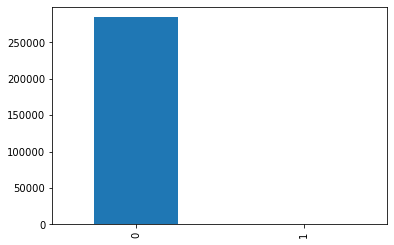

In [11]:
#Plotting the value counts of the "class" feature
df.Class.value_counts().plot.bar()

In [12]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

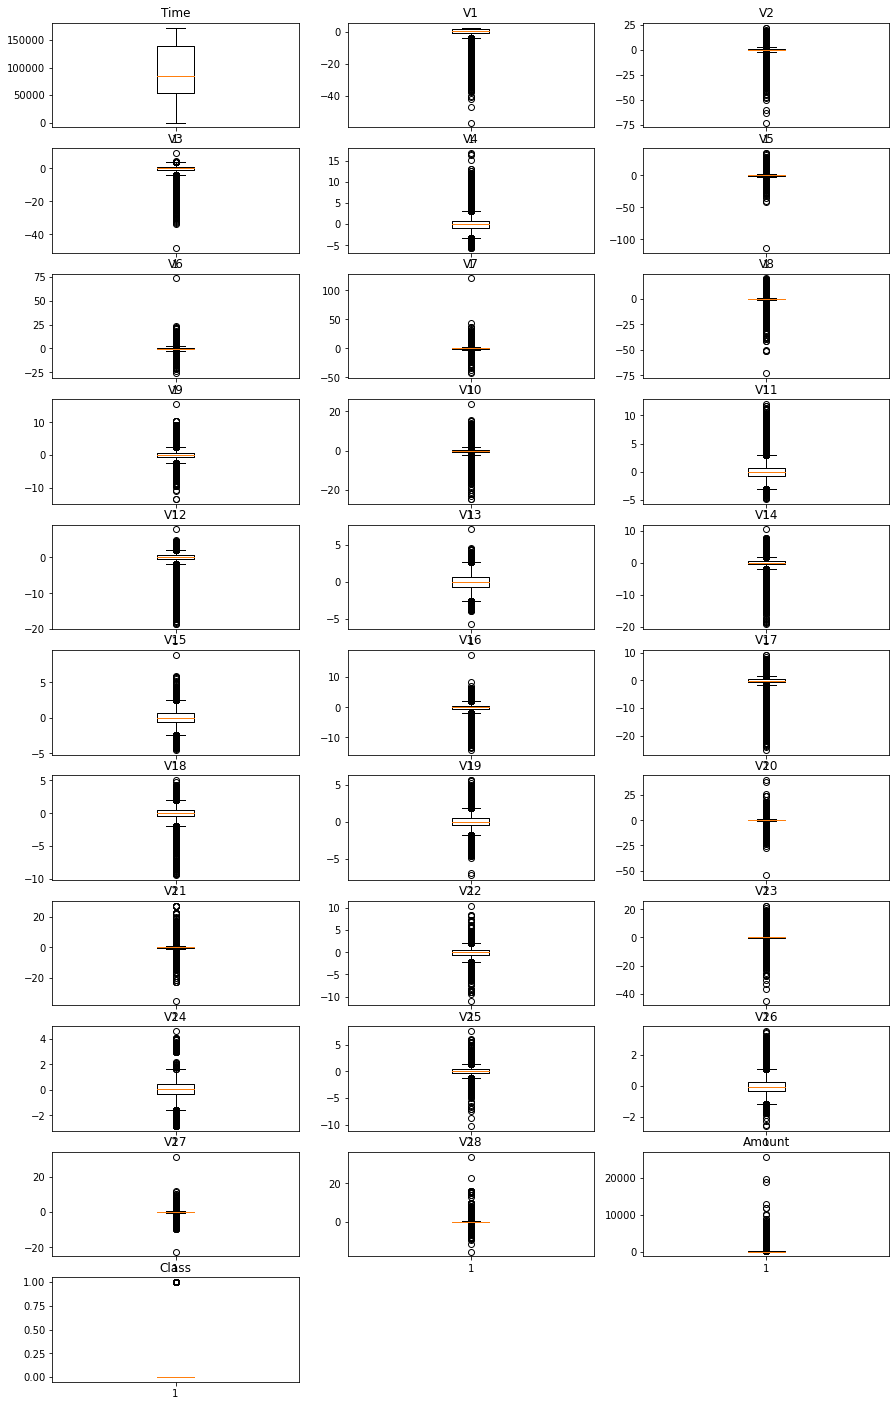

In [13]:
# Checking for the Outliers in the dataset
plt.figure(figsize = (15,25))
count = 1
for col in df:
    plt.subplot(11,3,count)
    plt.boxplot(df[col])
    plt.title(col)
    count += 1
plt.show()

##### Independent Features and Dependent Features

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [17]:
# Splitting in to Train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(199364, 30) (85443, 30) (199364,) (85443,)


In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# Let's create the ANN model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [21]:
# Initializing the ANN
model = Sequential()

In [22]:
# Adding the input layer and first Hidden Layer
model.add(Dense(activation = "relu", input_dim = 30, units = 6, kernel_initializer='uniform' ))

# Adding the Second hidden layer
model.add(Dense(activation = "relu", units =20, kernel_initializer='uniform'))

# Adding the third hidden layer
model.add(Dense(activation = "relu", units = 10, kernel_initializer='uniform'))

# Addinng the output Layer
model.add(Dense(activation = 'sigmoid', units =1, kernel_initializer='uniform',))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 186       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


In [24]:
# compiling the ANN
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [25]:
# Fitting the ANN to the training set
model.fit(X_train, y_train, batch_size = 100, epochs =10)

Epoch 1/10
1994/1994 [==============================] - 3s 1ms/step - loss: 0.1319 - accuracy: 0.9983
Epoch 2/10
1994/1994 [==============================] - 2s 1ms/step - loss: 0.0047 - accuracy: 0.9982
Epoch 3/10
1994/1994 [==============================] - 2s 985us/step - loss: 0.0029 - accuracy: 0.9995
Epoch 4/10
1994/1994 [==============================] - 2s 955us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 5/10
1994/1994 [==============================] - 2s 969us/step - loss: 0.0032 - accuracy: 0.9993
Epoch 6/10
1994/1994 [==============================] - 2s 999us/step - loss: 0.0027 - accuracy: 0.9994
Epoch 7/10
1994/1994 [==============================] - 2s 1ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 8/10
1994/1994 [==============================] - 2s 1ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 9/10
1994/1994 [==============================] - 2s 1ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 10/10
1994/1994 [==============================] - 2s 1ms/step - los

In [26]:
# Making the Prediction and Evaluating the model
# Predicting the Test set result
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

##### evaluating the accuracy score and confusion matrix

In [27]:
# Checking the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_pred, y_test))

Accuracy Score :  0.9993797034280163
Confusion Matrix:  [[85275    32]
 [   21   115]]
